In [1]:
%load_ext autoreload  
%autoreload 2  

import sys  
sys.path.append('../')  
import OCPY as op  
import numpy as np  
from matplotlib import pyplot as plt  


In [2]:
epochs = np.linspace(-30000, 55000, 60000)  
func = op.OC_model(epochs=epochs)  
lin = op.Lin()  
lin.dP = op.Parameter(0, std=1e-7)  
lin.dT = op.Parameter(0, std=1e-4)  
quad = op.Quad()  
quad.Q = op.Parameter(0, std=1e-4)  
lite = op.LiTE()  
lite.amp = op.Parameter(0.04 * 24 * 3600, unit="second", min=0, std=0.05*24*3600)  
lite.e = op.Parameter(0.5, min=0, max=1, std=.3) 
lite.P_LiTE = op.Parameter(55000 * 0.370564, unit="day", min=0, std=10000)  
lite.T_LiTE = op.Parameter(40000 * 0.370564 + 39954.025, unit="BJD", std=50000)  
lite.omega = op.Parameter(0, min=0, max=360, std=180)  
func.add_model_component(lin)  
func.add_model_component(quad)  
func.add_model_component(lite)  
func.Ref_period = 0.370564  
func.Ref_mintime = 39954.025  

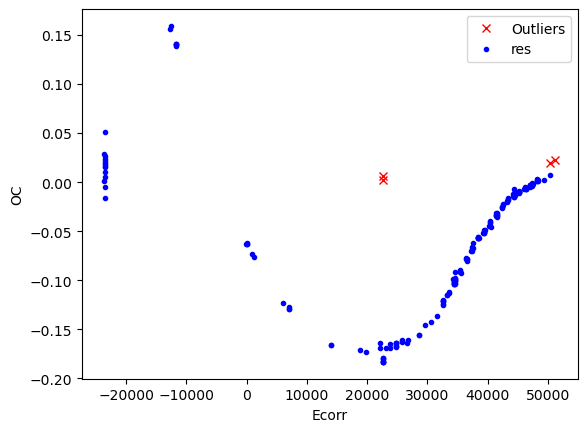

In [3]:
data = op.OC_data(data_file="999_xy_boo.xlsx")  

outliers = data.sigma_outliers(
    treshold=3, 
    plot=True, 
    additional_method="moving_window", 
    additional_params={"window_rate": 0.1, "window_step_rate": 0.03}
)  

data = data.remove_outliers(outliers=outliers)  

In [4]:
data = data.remove_data(data_groups="vis")  

In [5]:
data = data.fill_errors(method="with_value", group=None, value=0.01)  
# Assign a fixed error value of 0.01 to all data points regardless of their group.
# This is useful when uncertainties are not provided in the dataset.

data = data.fill_errors(method="with_value", group="pe", value=0.02)  
# Assign a specific error value of 0.02 to data points belonging to the "pe" (photoelectric) group.
# This allows different observational methods to have distinct uncertainties.

data.fill_weights()  
# Compute and assign weights to each data point based on their errors.
# Typically, weights are calculated as the inverse of the squared errors: weight = 1 / error².

print(data.Errors)  
# Print the assigned errors for verification.

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.01
 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [6]:
data.df

,Mintimes,Mintypes,Errors,Units,Data_group,Ecorr,OC,Weights
14,35270.6229,0,0.02,BJD,pe,-12639.0,0.156296,2500.0
15,35277.4813,1,0.02,BJD,pe,-12620.5,0.159262,2500.0
16,35622.4575,1,0.02,BJD,pe,-11689.5,0.140378,2500.0
17,35622.4578,1,0.02,BJD,pe,-11689.5,0.140678,2500.0
18,35624.4957,0,0.02,BJD,pe,-11684.0,0.140476,2500.0
...,...,...,...,...,...,...,...,...
190,57843.5593,1,0.01,BJD,CCD,48276.5,0.001354,10000.0
191,57846.5250,1,0.01,BJD,CCD,48284.5,0.002542,10000.0
192,57876.7248,0,0.01,BJD,CCD,48366.0,0.001376,10000.0
193,58244.6952,0,0.01,BJD,CCD,49359.0,0.001724,10000.0


In [7]:
fit = op.fit(model=func, data=data)
# Create a fitting object that links the OC model (`func`) with the observational data (`data`).
# This prepares the model for parameter optimization.

e= 0.5


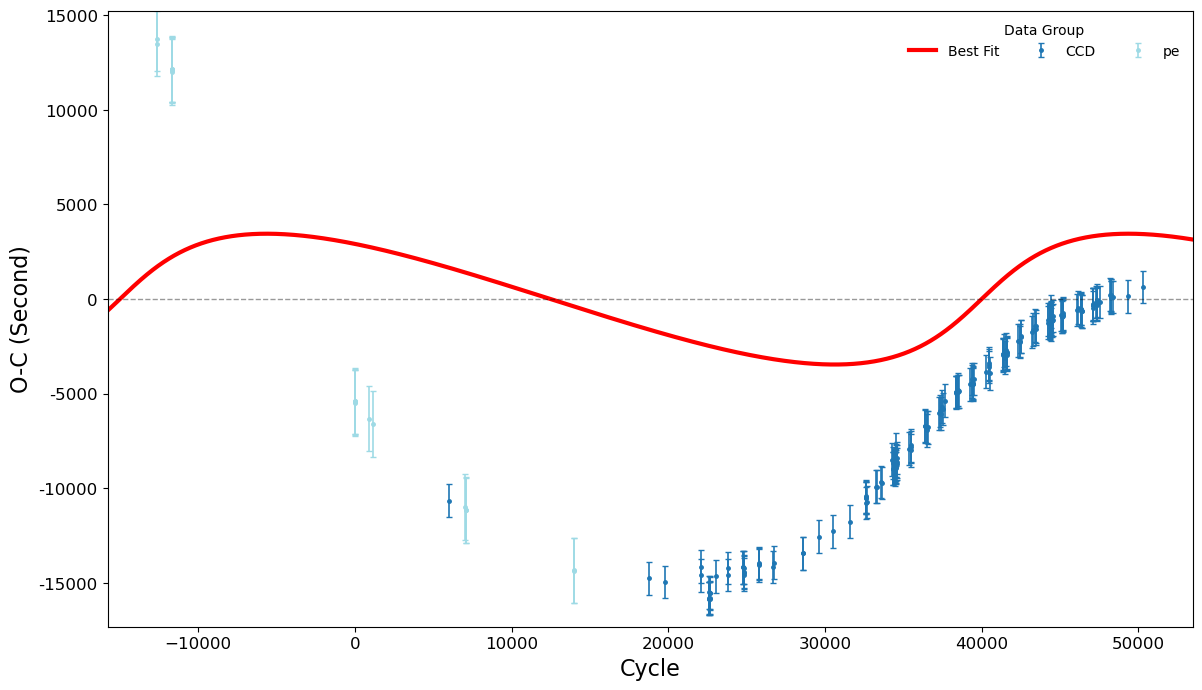

In [8]:
fit.plot() # plotting with given model

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\bar1s\anaconda3\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [01:57<00:00,  8.48it/s]


Using all 100 walkers without filtering for stuck walkers.
samples burned in
new model created
Saving MCMC samples to undefined_emcee_samples_100_1000_LinQuadLiTE_1.out...
Saving percentile results to undefined_emcee_percentiles_100_1000_LinQuadLiTE_1.out...


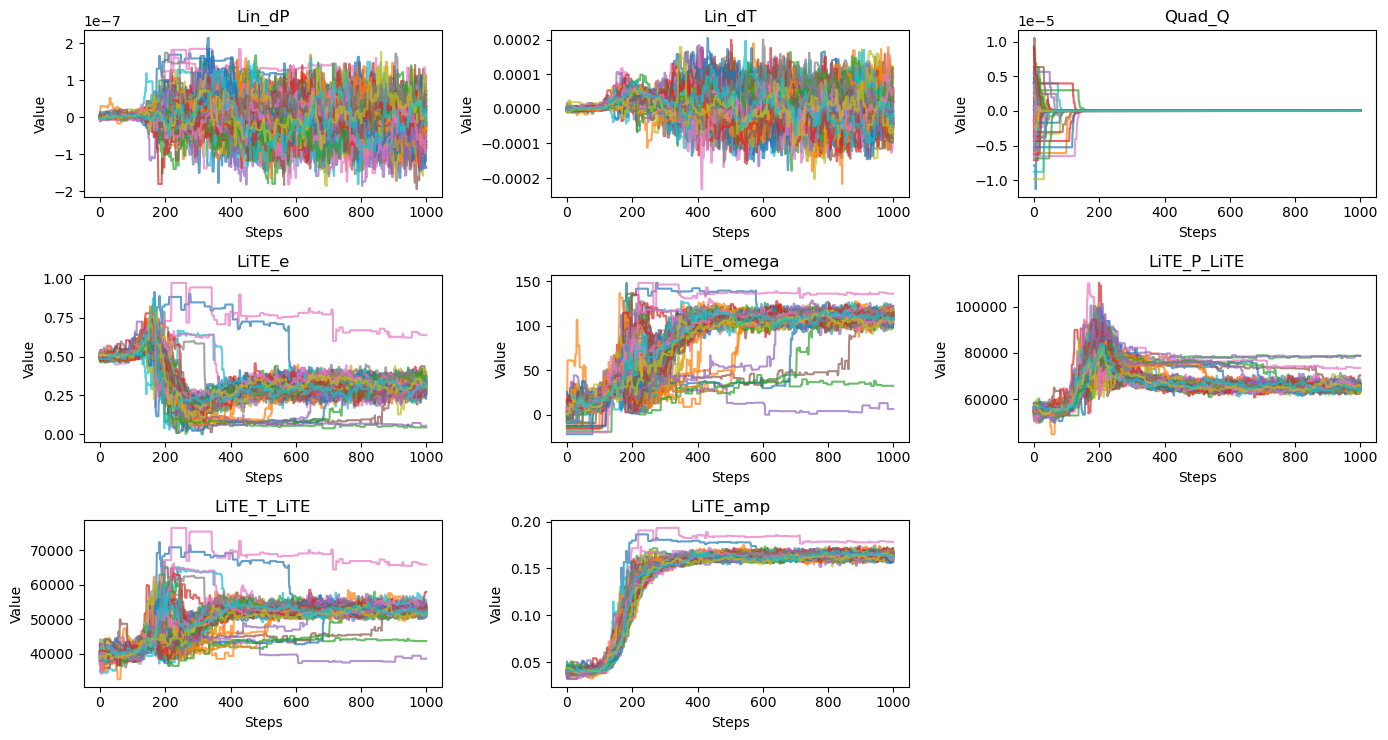

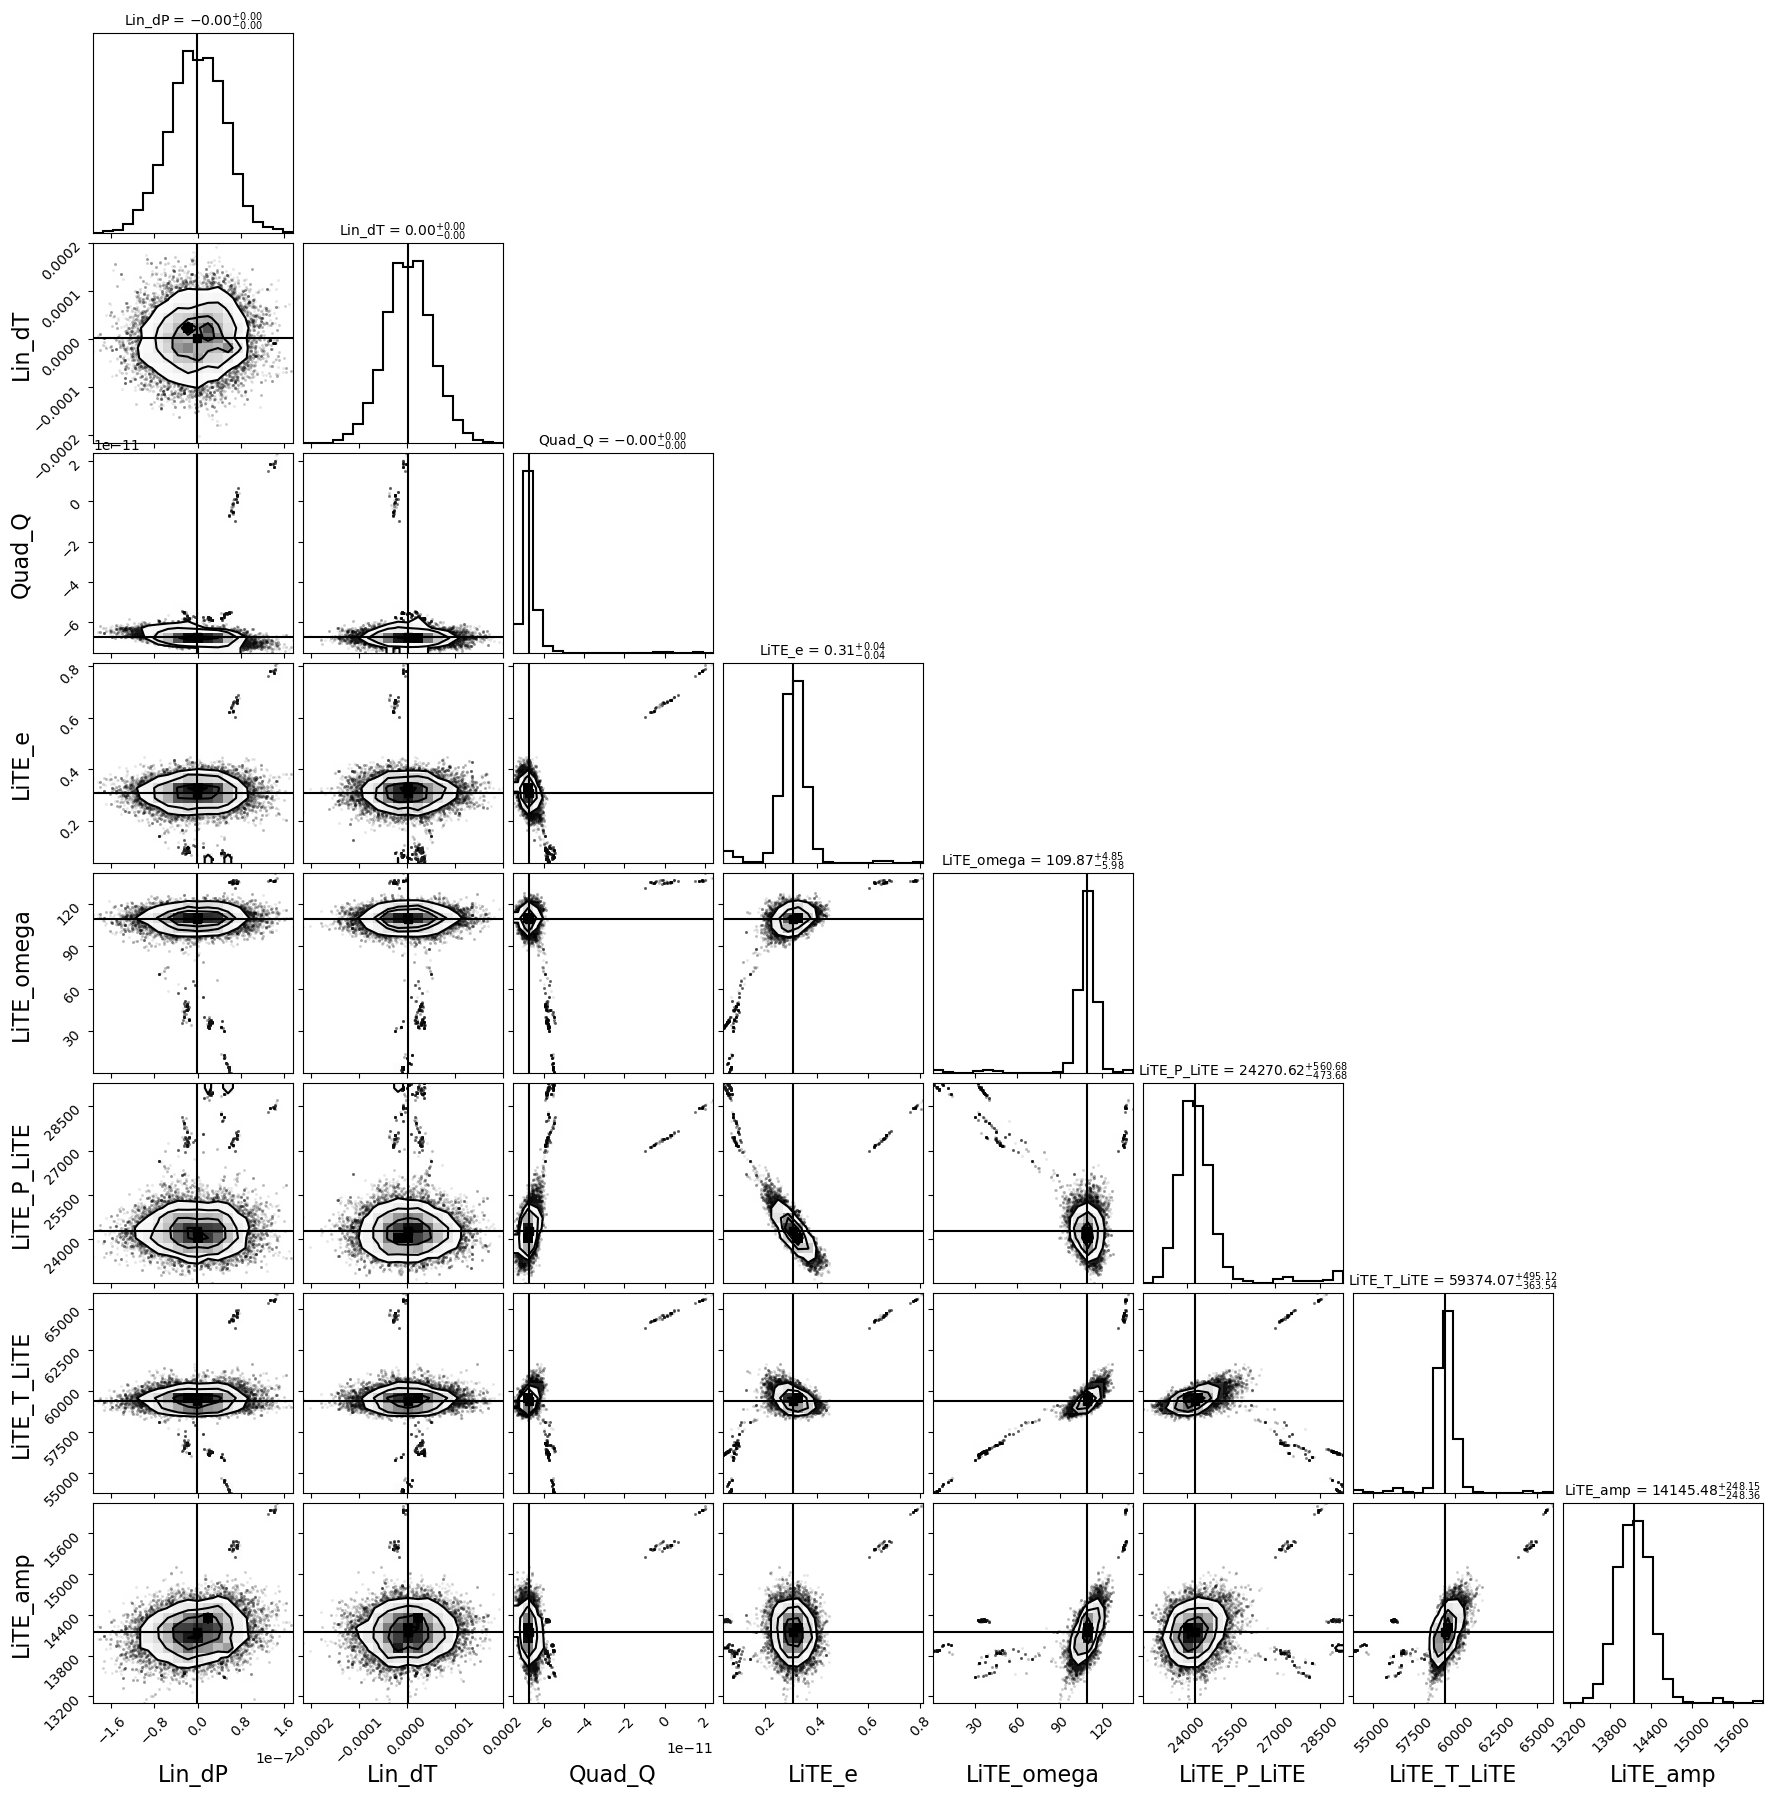

e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.3500419376243726
e= 0.31020025539603163
e= 0.26700216100193735
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163
e= 0.31020025539603163


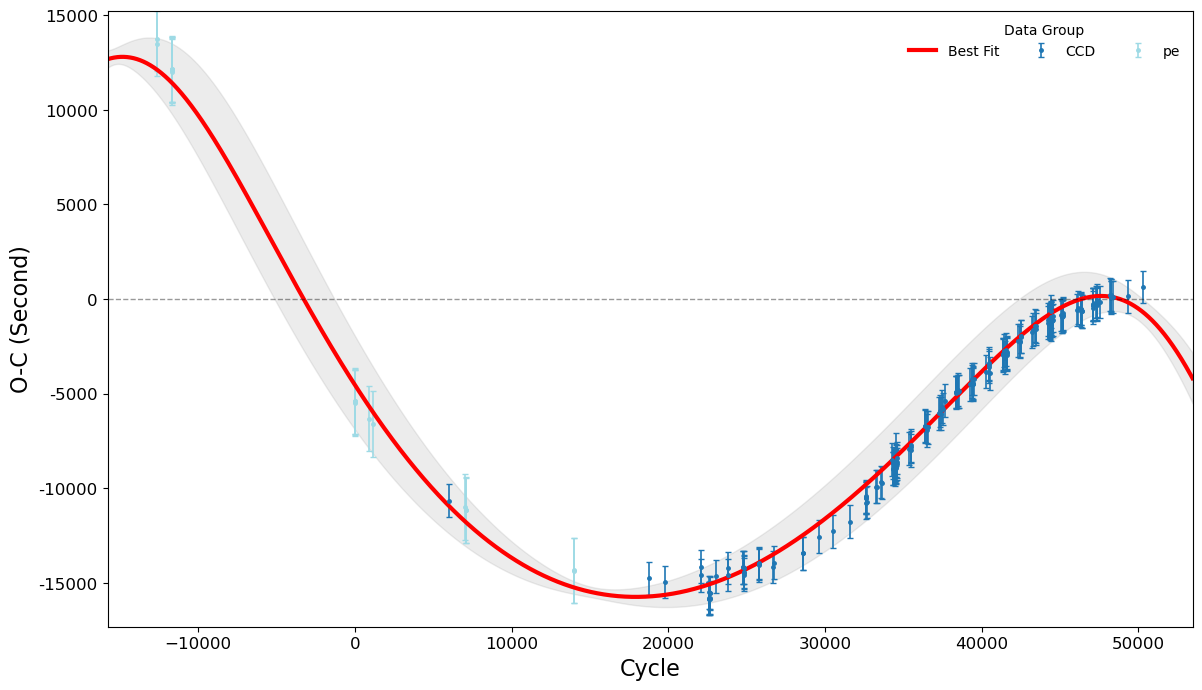

In [9]:
samples = fit.fit_model_prob(walker=100, steps=1000, burn_in=600, threads=20, create_sample_file=True, create_percentile_file=True, trace_plot=True, corner_plot=True, sample_plot=True, save_plots=False, show_plots=True, prob_prior=True)

In [15]:
cleared_samples = fit.clear_emcee_sample(samples, threshold=.01) # Clearing bad samples

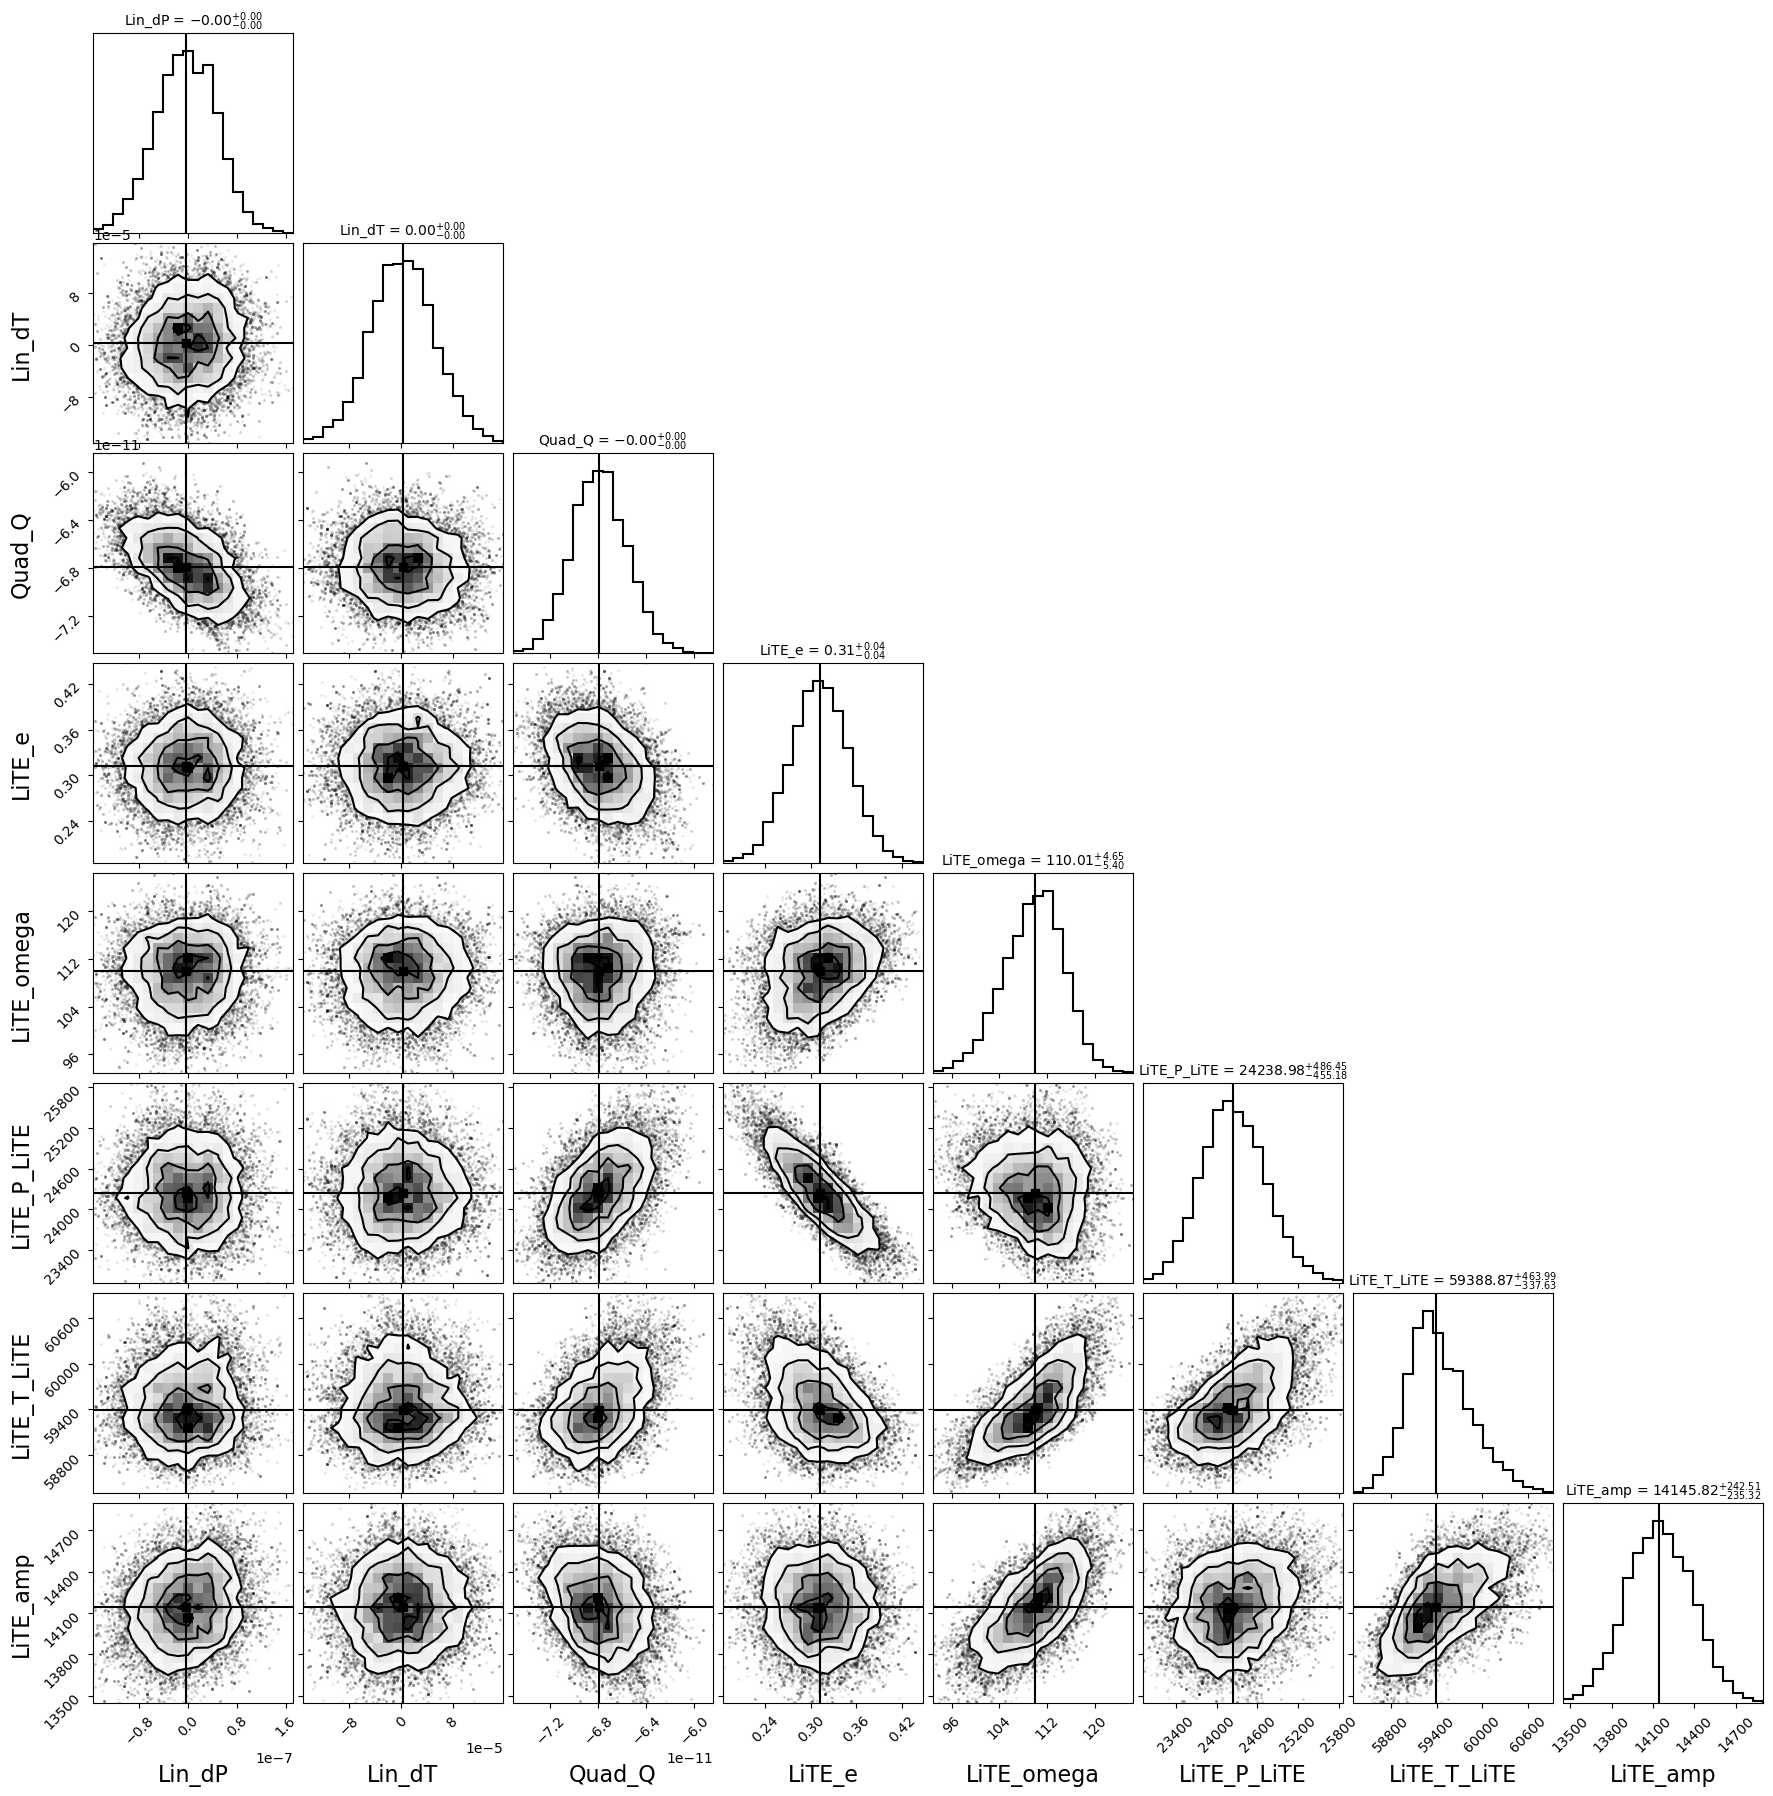

In [16]:
fit.corner_plot(cleared_samples, show=True) # getting corner plot of cleared samples

In [17]:
fit.fitted_model = fit.create_model_from_samples(cleared_samples) # changing fitted models with cleared samples

e= 0.3116046174621928


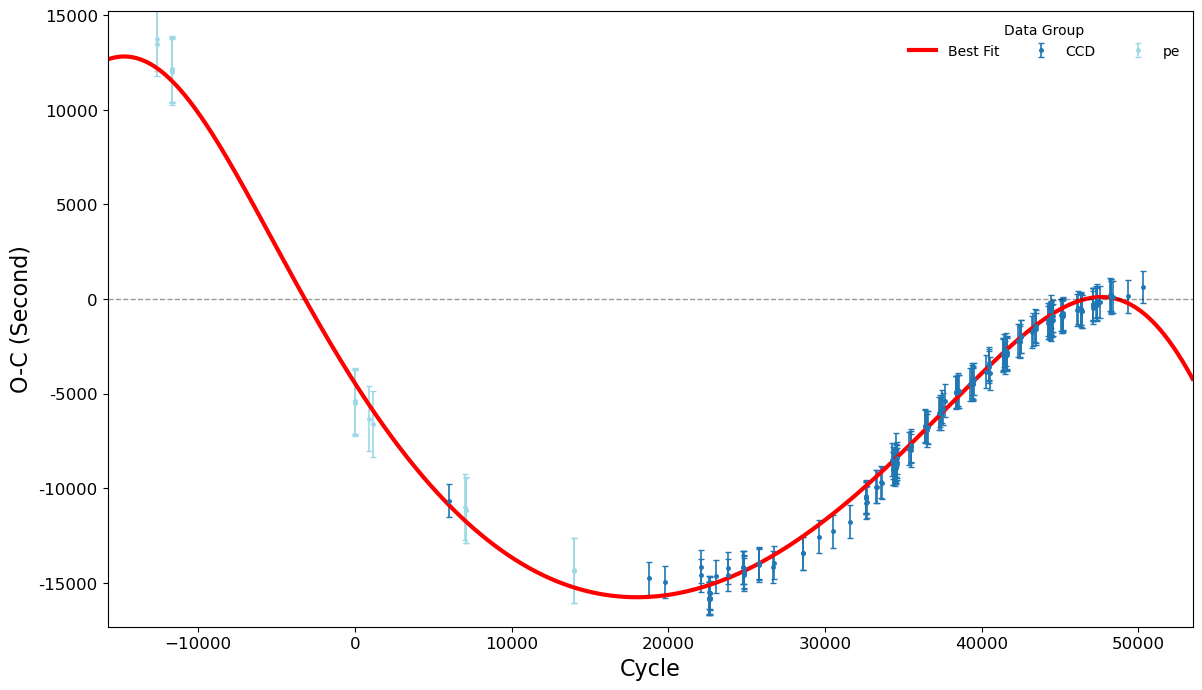

In [18]:
fit.plot()

In [19]:
fit.model_params()

{'dP': -2.5505310759406365e-09 day, 'dT': 2.6403987931162836e-06 day}
{'Q': -6.792004293405402e-11 Unitless}
{'e': 0.3116046174621928 Unitless, 'omega': 110.0076269979098 deg, 'P_LiTE': 24238.97715172334 day, 'T_LiTE': 59388.866384267545 BJD, 'amp': 14145.815613090583 second}
